In [0]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

$$m\frac{dv}{dt}=F(x, v, t)=-kx-cv$$
$$\frac{dx}{dt}=v$$

$$v_{t+1}\simeq v_t + \frac{F(x_t, v_t, t)}{m}\Delta t = v_t + \frac{-kx_t-cv_t}{m}\Delta t $$
$$x_{t+1}\simeq x_t+v_t \Delta t  $$

In [0]:
class DampedVibrationResNet(nn.Module):

    def __init__(
        self,
        k: float,
        c: float,
        m: float,
    ):
        super(DampedVibrationResNet, self).__init__()

        self._K = k  # spring constant
        self._C = c  # viscous damping coefficient
        self._m = m  # mass
        self._t = 0.0  # time

    def forward(self, x, v, dt):
        self._t += dt
        f = self._force(x, v, self._t)
        
        next_v = v + f/self._m
        next_x = x + v*dt

        return next_x, next_v

    def _force(self, x, v, t):
        return -self._K * x - self._C * v
    
    def init(self):
        self._t = 0.0

    @property
    def t(self):
        return self._t

In [0]:
DT = 0.01

### 1個シミュレーション

In [0]:
x = torch.Tensor([1]).unsqueeze(0).float()
v = torch.Tensor([5]).unsqueeze(0).float()

In [56]:
x.shape

torch.Size([1, 1])

In [0]:
rvrn = DampedVibrationResNet(
    k=0.5,
    c=0.02,
    m=1.0,
)

In [0]:
MAX_T = 10

In [0]:
rvrn.init()

xs = [float(x.squeeze())]
vs = [float(v.squeeze())]

while rvrn.t < MAX_T:
    x, v = rvrn(x, v, DT)
    xs.append(float(x.squeeze()))
    vs.append(float(v.squeeze()))

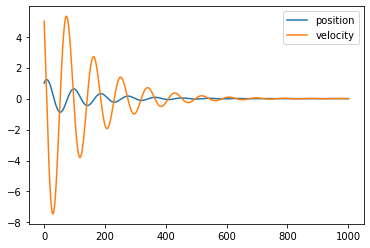

In [60]:
plt.plot(range(len(xs)), xs, label='position')
plt.plot(range(len(vs)), vs, label='velocity')
plt.legend()

In [61]:
6 * (torch.rand(10) - 0.5)

tensor([0.9531, 0.7769, 0.0077, 0.3131, 0.6585, 0.2504, 0.7644, 0.8186, 0.4300,
        0.7087])

### 10個同時シミュレーション

In [0]:
# 10個の初期状態生成
x = (6 * (torch.rand(10) - 0.5)).unsqueeze(0).float()
v = (6 * (torch.rand(10) - 0.5)).unsqueeze(0).float()

In [85]:
x

tensor([[ 0.7912, -2.6890,  1.0592,  2.7771, -1.5613,  1.6413,  1.8132, -1.0759,
         -1.3184,  2.8181]])

In [0]:
rvrn.init()

xs = [x.squeeze().detach().numpy()]
vs = [v.squeeze().detach().numpy()]

while rvrn.t < MAX_T:
    x, v = rvrn(x, v, DT)
    xs.append(x.squeeze().detach().numpy())
    vs.append(v.squeeze().detach().numpy())

xs = np.array(xs)
vs = np.array(vs)

In [87]:
xs.shape

(1002, 10)

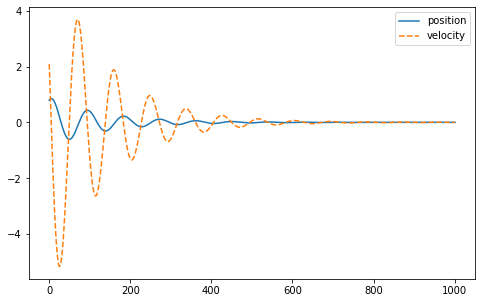

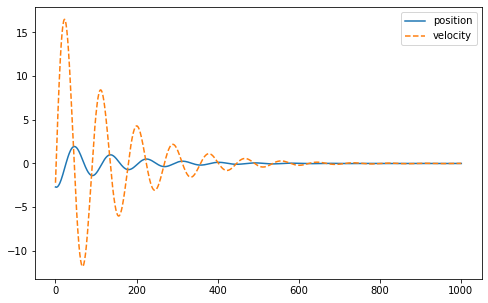

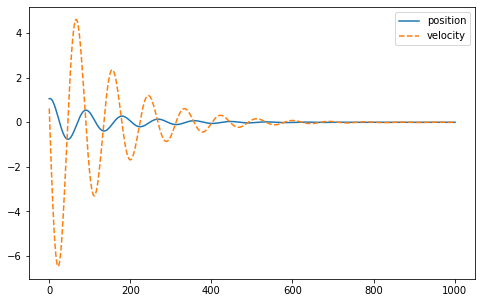

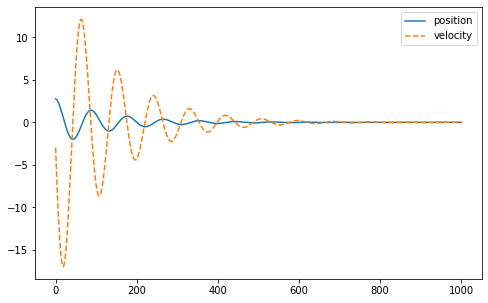

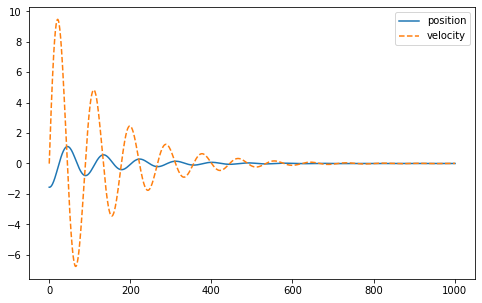

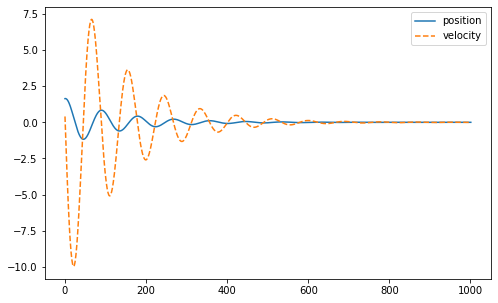

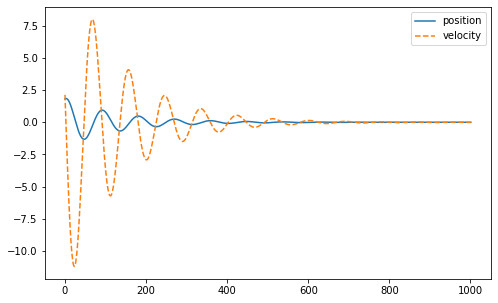

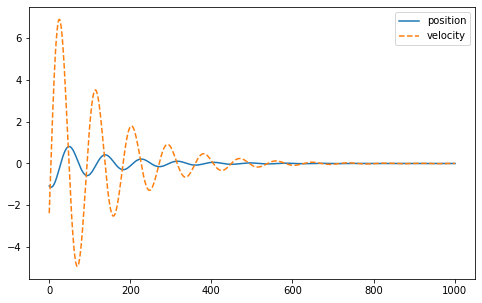

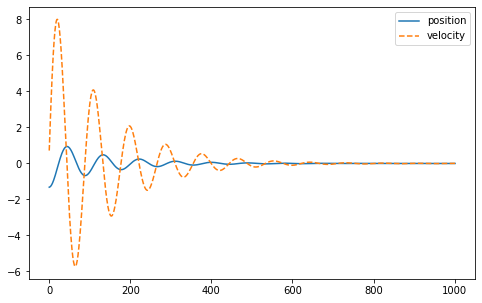

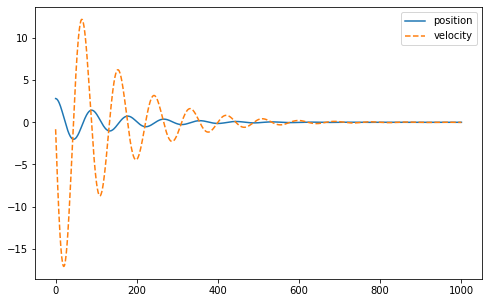

In [88]:

for i in range(xs.shape[1]):
    plt.figure(figsize=(8, 5))
    x_ = xs[:, i]
    v_ = vs[:, i]
    plt.plot(range(len(x_)), x_, label='position')
    plt.plot(range(len(v_)), v_, label='velocity', linestyle='dashed')
    plt.legend()
    plt.show()